In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
# Load the CSV file into a DataFrame
df = pd.read_csv('face_embeddings_with_gender_age.csv')
df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,Ages,Genders
0,-0.090280,0.064722,-0.021587,-0.093356,-0.140869,0.012009,-0.086527,-0.183685,0.124093,-0.186535,...,0.030215,-0.003760,-0.232699,-0.064718,0.056156,0.005579,0.151257,0.036387,26,0
1,-0.213928,0.084105,0.026203,-0.109166,-0.139733,-0.055226,-0.051353,-0.085713,0.225727,-0.221371,...,0.047486,-0.109802,-0.154260,-0.048229,0.124661,-0.083602,0.079974,-0.029686,21,1
2,-0.132697,0.066546,-0.017067,-0.099028,-0.119437,-0.026709,0.008419,-0.181273,0.285175,-0.104315,...,0.122190,-0.040833,-0.126845,-0.042998,0.078022,-0.053788,0.065341,-0.000984,17,1
3,-0.048243,0.198321,0.074940,-0.041815,-0.135962,0.026425,0.010938,-0.110959,0.099625,-0.099917,...,-0.040831,0.011620,-0.194471,-0.183038,0.010346,-0.043231,0.016838,0.067529,76,0
4,-0.099984,0.020674,-0.005088,-0.141875,-0.085031,0.055902,-0.007240,-0.103044,0.232539,-0.178686,...,-0.027147,-0.095705,-0.155239,0.000660,0.065620,-0.007807,0.044118,0.032232,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,-0.112516,-0.016032,0.005225,-0.116755,-0.135476,-0.048275,0.023105,-0.077122,0.178425,-0.122600,...,0.002444,-0.025589,-0.170702,-0.063840,0.135181,-0.052679,0.120016,0.082703,3,0
7719,-0.042791,0.104845,0.064417,-0.012526,-0.103521,-0.019845,0.000817,-0.046758,0.141868,-0.072470,...,0.053773,-0.086297,-0.254491,-0.057954,0.003670,-0.053298,0.129272,0.039586,28,0
7720,-0.100780,0.027209,0.033302,-0.059077,-0.061631,-0.038820,-0.066106,-0.039565,0.188124,-0.125571,...,-0.048867,-0.034108,-0.194195,-0.061578,0.058807,-0.021744,0.067232,0.016582,10,0
7721,-0.094525,0.023215,0.004823,-0.082341,-0.148988,-0.076524,-0.039071,-0.071549,0.171603,-0.107515,...,-0.009252,-0.073617,-0.140649,-0.064753,0.100642,-0.097404,0.012975,-0.086318,8,1


In [11]:
# Separate features and labels
X = df.iloc[:, :-2]  # Assuming the first columns are face embeddings
y_age = df['Ages']
y_gender = df['Genders']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(
    X, y_age, y_gender, test_size=0.2, random_state=42
)

In [13]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Train the age prediction model (SVR)
age_model = SVR()
age_model.fit(X_train, y_age_train)

SVR()

In [15]:
# Train the gender classification model (SVC)
gender_model = SVC()
gender_model.fit(X_train, y_gender_train)

SVC()

In [16]:
# Make predictions
y_age_pred = age_model.predict(X_test)
y_gender_pred = gender_model.predict(X_test)

In [17]:
# Evaluate age prediction model
mae = mean_absolute_error(y_age_test, y_age_pred)
print("Mean Absolute Error (MAE) for Age Prediction:", mae)

# Evaluate gender classification model
print("Gender Classification Report:")
print(classification_report(y_gender_test, y_gender_pred))

Mean Absolute Error (MAE) for Age Prediction: 6.148104352185636
Gender Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       688
           1       0.88      0.90      0.89       857

    accuracy                           0.88      1545
   macro avg       0.88      0.88      0.88      1545
weighted avg       0.88      0.88      0.88      1545



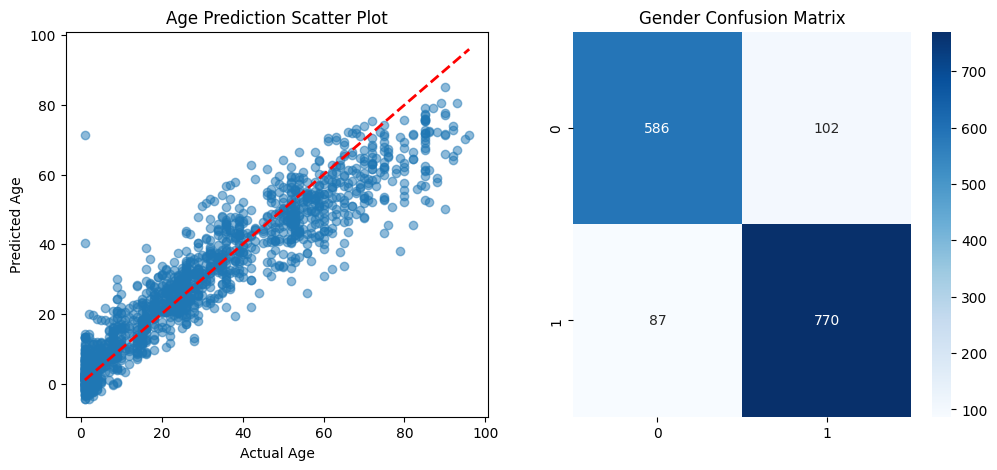

In [18]:
# Create confusion matrix heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age scatter plot for predictions vs actual values
axes[0].scatter(y_age_test, y_age_pred, alpha=0.5)
axes[0].plot([min(y_age_test), max(y_age_test)], [min(y_age_test), max(y_age_test)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Age')
axes[0].set_ylabel('Predicted Age')
axes[0].set_title('Age Prediction Scatter Plot')

# Gender confusion matrix
cm_gender = confusion_matrix(y_gender_test, y_gender_pred)
sns.heatmap(cm_gender, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Gender Confusion Matrix')

plt.show()

In [22]:
import joblib

# Save the age prediction model
joblib.dump(age_model, 'age_model.pkl')

# Save the gender classification model
joblib.dump(gender_model, 'gender_model.pkl')


['gender_model.pkl']